# Pentathlon 2: Testing for the best frequency

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Calculate the CLV over 8 weeks for each email frequency

In [2]:
pentathlon2 = pd.read_excel('data/pentathlon-2.xls')

In [3]:
freq1 = pentathlon2.loc[0:2, "Week 1":].T.rename(columns = {0:'attr', 1:'rev_sub', 2:'rev_unsub'})
freq2 = pentathlon2.loc[5:7, "Week 1":].T.rename(columns = {5:'attr', 6:'rev_sub', 7:'rev_unsub'})
freq3 = pentathlon2.loc[10:12, "Week 1":].T.rename(columns = {10:'attr', 11:'rev_sub', 12:'rev_unsub'})
freq4 = pentathlon2.loc[15:17, "Week 1":].T.rename(columns = {15:'attr', 16:'rev_sub', 17:'rev_unsub'})
freq5 = pentathlon2.loc[20:22, "Week 1":].T.rename(columns = {20:'attr', 21:'rev_sub', 22:'rev_unsub'})

**Assumptions:**  
1. Average revenue is further calculated across all subscribed and unsubscribed customers.
2. When a purchase is made, the payment is received right afterwards. (use the 0.5 discount # for average discounting)
3. Request to unsubscribe is going to be processed at the end of the week. (week 1 has 100% subscription)
4. Customers randomly assigned to 5 email-frequency groups.
5. Customers have probabilities of being subscribed or unsubscribed based on attrition rate.

In [4]:
weeks = np.arange(1, 9)
cogs = 0.6 # cost of goods sold
annual_discount_rate = 0.1
weekly_discount_rate = (1+annual_discount_rate)**(1/52)-1

In [5]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)

In [6]:
seq = np.arange(0.5, 8, 1)

profit_subcribed = freq4.rev_sub * (1-cogs)
profit_unsubscribed = freq4.rev_unsub * (1-cogs)

i = 1
prob_act = [1]
for iter in range(7):
    i = i*(1-freq4.attr[iter]) # the probability is compounding
    prob_act.append(i)     
prob_inact = [1-prob for prob in prob_act] 

probability_subscribed = np.array(prob_act)
probability_unsubscribed = np.array(prob_inact)
expected_profit = profit_subcribed * probability_subscribed + profit_unsubscribed * probability_unsubscribed
pv_expected_profit = np.array([e/(1+weekly_discount_rate)**s for e,s in zip(expected_profit,seq)])

clv_list = [pv_expected_profit[0]]
for c in range(1,8):
    value = pv_expected_profit[c] + clv_list[c-1]
    clv_list.append(value)
    
clv = np.array(clv_list)
clv

array([0.14386809, 0.27719104, 0.3916824 , 0.53143754, 0.67068531,
       0.78702604, 0.90707565, 1.02758498])

In [8]:
def clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame using the results from 
    the email frequency experiment
    
    Parameters
    ----------
    df : Pandas DataFrame (8, 3)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (8,) with values 1 through 8
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (8,)
        CLV values calculate for week 1 through week 8

    """
    
    seq = np.arange(0.5, 8, 1)

    profit_subcribed = df.rev_sub * (1-cogs)
    profit_unsubscribed = df.rev_unsub * (1-cogs)

    i = 1
    prob_act = [1]
    for iter in range(7):
        i = i*(1-df.attr[iter]) # the probability is compounding
        prob_act.append(i)     
    prob_inact = [1-prob for prob in prob_act] 

    probability_subscribed = np.array(prob_act)
    probability_unsubscribed = np.array(prob_inact)
    expected_profit = profit_subcribed * probability_subscribed + profit_unsubscribed * probability_unsubscribed
    pv_expected_profit = np.array([e/(1+weekly_discount_rate)**s for e,s in zip(expected_profit,seq)])

    clv_list = [pv_expected_profit[0]]
    for c in range(1,8):
        value = pv_expected_profit[c] + clv_list[c-1]
        clv_list.append(value)
        
    clv = np.array(clv_list)  

    return clv

In [9]:
clv1 = clv_calc(freq1, weeks, cogs, weekly_discount_rate)
clv2 = clv_calc(freq2, weeks, cogs, weekly_discount_rate)
clv3 = clv_calc(freq3, weeks, cogs, weekly_discount_rate)
clv4 = clv_calc(freq4, weeks, cogs, weekly_discount_rate)
clv5 = clv_calc(freq5, weeks, cogs, weekly_discount_rate)

CLV8 = pd.DataFrame({'weeks':weeks, 'freq1':clv1, 'freq2':clv2, 'freq3':clv3, 'freq4':clv4, 'freq5':clv5})
CLV8

,weeks,freq1,freq2,freq3,freq4,freq5
0,1,0.115894,0.139872,0.147864,0.143868,0.143868
1,2,0.239335,0.259279,0.270128,0.277191,0.272110
2,3,0.358297,0.397659,0.409457,0.391682,0.385031
3,4,0.484524,0.550547,0.559069,0.531438,0.522659
4,5,0.598461,0.671557,0.682616,0.670685,0.650240
5,6,0.700280,0.799185,0.810303,0.787026,0.774683
6,7,0.805389,0.933803,0.944781,0.907076,0.888887
7,8,0.913969,1.063883,1.072293,1.027585,0.995609


### Create a line graph of the CLV values for each plan change over the 8 week period. Your code should create a single plot with 5 lines

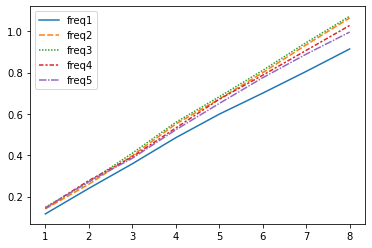

In [10]:
# use seaborn to create a line chart that shows CLV over the 8 week period
CLV8.index = np.arange(1, 9)
CLV8 = CLV8.drop(columns = ["weeks"])

fig = sns.lineplot(data=CLV8)
plt.show()

CLV8 = pd.DataFrame({'weeks':weeks, 'freq1':clv1, 'freq2':clv2, 'freq3':clv3, 'freq4':clv4, 'freq5':clv5})

### What e-mail frequency should Pentathlon adopt based on the available data?

Based on the calculations from question 1 and question 2, I believe the email frequency Pentathlon should adopt is to send 3-emails per week. 

The reason is that the customer lifetime value during the 8 weeks is maximized at frequency 3.

Additionally, the available data here provides the attrition rate, revenue of subscribed customers and revenue of unsubscribed customers in 5 frequency groups. 
The groups are randomized assigned. In this situation, a causal claim would be: email frequency affects customer lifetime values.
The factor of interest is email frequencies. Probability equivalence exist, the comparison between groups is valid.

### What e-mail frequency would you recommend if you considered a longer time horizon?

I would recommend considered a longer time horizon is frequency 2 based on the available data. 
Looking at the customer lifetime calculation in question 1 and question 2, the maximum appears to be the frequency 3 and the second maximum appears to be the frequency 2.
There isn't huge difference between frequency 2 and frequency 3 in short term. So it is reasonable to include further evidence to set up the e-mail frequency for longer term.

A further evidence to consider is the attrition rate under email frequency groups.
It is important to keep the customer attrition rate as low as possible because he revenue of subscribed customers are larger than unsubscribed customers in general for all the 5 groups.
While frequency 1 has the lowest attrition rate, frequency 2 has the larger revenue.

Considering the customer lifetime calculation and attrition rate, I would recommend frequency 2.

In [11]:
print(freq1.attr.mean(),freq2.attr.mean(),freq3.attr.mean(),freq4.attr.mean(),freq5.attr.mean())
print(freq1.rev_sub.mean(),freq2.rev_sub.mean(),freq3.rev_sub.mean(),freq4.rev_sub.mean(),freq5.rev_sub.mean())
print(freq1.rev_unsub.mean(),freq2.rev_unsub.mean(),freq3.rev_unsub.mean(),freq4.rev_unsub.mean(),freq5.rev_unsub.mean())

0.0046875 0.0070125 0.026499999999999996 0.04038750000000001 0.063025
0.29000000000000004 0.33999999999999997 0.35625 0.355 0.35875000000000007
0.1225 0.12375 0.15 0.1325 0.13


###  CLV over 104 weeks 

In [12]:
sim_clv = pd.read_csv("data/pentathlon-2-avg.csv")

In [13]:
weeks104 = np.arange(1, 104 + 1)
cogs = 0.6
annual_discount_rate = 0.1
weekly_discount_rate = (1+annual_discount_rate)**(1/52)-1

In [14]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)

In [15]:
seq104 = np.arange(0.5, 104, 1)

profit_subcribed104 = float(sim_clv[sim_clv["email_freq"] == "freq4"].rev_sub * (1-cogs))
profit_unsubscribed104 = float(sim_clv[sim_clv["email_freq"] == "freq4"].rev_unsub * (1-cogs))

i = 1
prob_act104 = [1]
for iter in range(103):
    i = i*(1-float(sim_clv[sim_clv["email_freq"] == "freq4"].schurn)) # the probability is compounding
    prob_act104.append(i)     
prob_inact104 = [1-prob for prob in prob_act104] 

probability_subscribed104 = np.array(prob_act104)
probability_unsubscribed104 = np.array(prob_inact104)

exp_prof_sub = [profit_subcribed104 * prob for prob in probability_subscribed104]
exp_prof_unsub = [profit_unsubscribed104 * prob for prob in probability_unsubscribed104]

expected_profit104 = np.array([x+y for x,y in zip(exp_prof_sub,exp_prof_unsub)])
pv_expected_profit104 = np.array([e/(1+weekly_discount_rate)** s for e,s in zip(expected_profit104,seq104)])

clv104_list = [pv_expected_profit104[0]]
for c in range(1,104):
    value = pv_expected_profit104[c] + clv104_list[c-1]
    clv104_list.append(value)

clv104 = np.array(clv104_list)
clv104

array([0.14193263, 0.28043176, 0.41562561, 0.54763744, 0.67658581,
       0.80258473, 0.92574382, 1.04616852, 1.16396021, 1.27921639,
       1.3920308 , 1.50249363, 1.61069156, 1.71670798, 1.82062308,
       1.92251397, 2.02245481, 2.1205169 , 2.21676884, 2.31127656,
       2.4041035 , 2.49531066, 2.58495669, 2.67309801, 2.75978887,
       2.84508144, 2.9290259 , 3.01167051, 3.09306167, 3.17324402,
       3.25226047, 3.33015232, 3.40695927, 3.48271949, 3.55746971,
       3.63124525, 3.70408008, 3.77600687, 3.84705704, 3.9172608 ,
       3.98664724, 4.05524429, 4.12307885, 4.19017679, 4.25656297,
       4.32226132, 4.38729485, 4.4516857 , 4.51545516, 4.5786237 ,
       4.64121103, 4.70323609, 4.76471711, 4.82567162, 4.88611648,
       4.94606793, 5.00554155, 5.06455238, 5.12311485, 5.18124285,
       5.23894975, 5.2962484 , 5.35315119, 5.40967   , 5.46581629,
       5.52160108, 5.57703497, 5.63212815, 5.68689044, 5.74133127,
       5.79545974, 5.84928458, 5.90281421, 5.95605672, 6.00901

In [16]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe

In [17]:
def sim_clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame with simulated 
    subscriber churn over a 104 week period
    
    Parameters
    ----------
    df : Pandas DataFrame (1, 4)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (n,) with values 1 through n
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (n,)
        CLV values calculate for week 1 through week n

    """

    seq104 = np.arange(0.5, 104, 1)

    profit_subcribed104 = float(df.rev_sub * (1-cogs))
    profit_unsubscribed104 = float(df.rev_unsub * (1-cogs))
    
    i = 1
    prob_act104 = [1]
    for iter in range(103):
        i = i*(1-float(df.schurn)) # the probability is compounding
        prob_act104.append(i)     
    prob_inact104 = [1-prob for prob in prob_act104] 
   
    probability_subscribed104 = np.array(prob_act104)
    probability_unsubscribed104 = np.array(prob_inact104)

    exp_prof_sub = [profit_subcribed104 * prob for prob in probability_subscribed104]
    exp_prof_unsub = [profit_unsubscribed104 * prob for prob in probability_unsubscribed104]

    expected_profit104 = np.array([x+y for x,y in zip(exp_prof_sub,exp_prof_unsub)])
    pv_expected_profit104 = np.array([e/(1+weekly_discount_rate)** s for e,s in zip(expected_profit104,seq104)])
    
    clv104_list = [pv_expected_profit104[0]]
    for c in range(1,104):
        value = pv_expected_profit104[c] + clv104_list[c-1]
        clv104_list.append(value)

    clv = np.array(clv104_list)
    
    return clv

In [18]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe

clv1 = sim_clv_calc(sim_clv[sim_clv["email_freq"] == "freq1"], weeks104, cogs, weekly_discount_rate)
clv2 = sim_clv_calc(sim_clv[sim_clv["email_freq"] == "freq2"], weeks104, cogs, weekly_discount_rate)
clv3 = sim_clv_calc(sim_clv[sim_clv["email_freq"] == "freq3"], weeks104, cogs, weekly_discount_rate)
clv4 = sim_clv_calc(sim_clv[sim_clv["email_freq"] == "freq4"], weeks104, cogs, weekly_discount_rate)
clv5 = sim_clv_calc(sim_clv[sim_clv["email_freq"] == "freq5"], weeks104, cogs, weekly_discount_rate)

CLV104 = pd.DataFrame({'weeks':weeks104, 'freq1':clv1, 'freq2':clv2, 'freq3':clv3, 'freq4':clv4, 'freq5':clv5})
CLV104

,weeks,freq1,freq2,freq3,freq4,freq5
0,1,0.115895,0.135878,0.142365,0.141933,0.143382
1,2,0.231309,0.270974,0.282460,0.280432,0.281429
2,3,0.346243,0.405293,0.420339,0.415626,0.414441
3,4,0.460701,0.538841,0.556058,0.547637,0.542704
4,5,0.574685,0.671624,0.689668,0.676586,0.666486
...,...,...,...,...,...,...
99,100,9.555871,10.490329,8.340831,7.260058,6.365888
100,101,9.633861,10.570305,8.395244,7.307726,6.409727
101,102,9.711559,10.649898,8.449406,7.355243,6.453472
102,103,9.788966,10.729110,8.503323,7.402612,6.497125


### Create a line chart that shows CLV over the 104 week period for each of the 5 email frequencies (i.e., 1 plot with 5 lines)

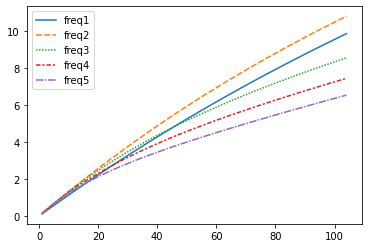

In [19]:
CLV104.index = np.arange(1, 105)
CLV104 = CLV104.drop(columns = ["weeks"])

fig = sns.lineplot(data=CLV104)
plt.show()

CLV104 = pd.DataFrame({'weeks':weeks104, 'freq1':clv1, 'freq2':clv2, 'freq3':clv3, 'freq4':clv4, 'freq5':clv5})

The available data used to calculate customer lifetime values are different. Also, the time range of calculation is different.

###  Two limitations of the experiment.

1. The experiment has confounding variables such as recency, frequency and monetary value of customers' purchase. Based on RFM analysis, recency, frequency and monetary value of purchase all counts as reasons behind people making purchase no matter they are subscribed to email or not. Adding variables including recency, frequency and monetary values into the experiment would help eliminate the confounding effect and address the limitation.

2. In the experiment, the emails are decentralized and might not be randomly assigned to the 5 email frequency groups. For example, a particular department might send email twice a week and another department might send email one two weeks. So, the emails customers received might be all from one department. The variation in department and customers' preference in different departments would leads to different purchase behaviors. Then, the customer lifetime value based on the emails would be affected. One way to address this limitation is to have Pentathlon centralize emails from different department and add the email category into the experiment.

3. The email frequency for customers is stable in the experiment. However, there are consumption trends in particular weeks of a year. The stable email frequency would not be the best way for marketing. A way to address the limitation is to include different combinations of email frequencies for different seasons or weeks of a year. 

